In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import model
import simulate_single_modality as simulate

In [2]:
device = "cpu" # the device on which the model is trained, can be "cpu", "cuda" or "mps" ("mps" is only available for mac with M-series chip)
random_seed = 2025
r2 = 0.5 # true r2 of the simulated data
n = 1000 # simulation sample size
dim = 5 # dimensions of the simulated images
coord, true_beta, img_data, y, true_sigma2 = simulate.simulate_data(n, r2, dim, random_seed)

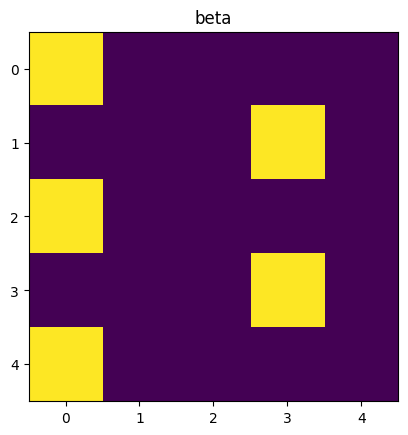

In [3]:
# plot true coefficients beta
plt.imshow(true_beta.reshape(dim, dim))
plt.title("beta")
plt.show();

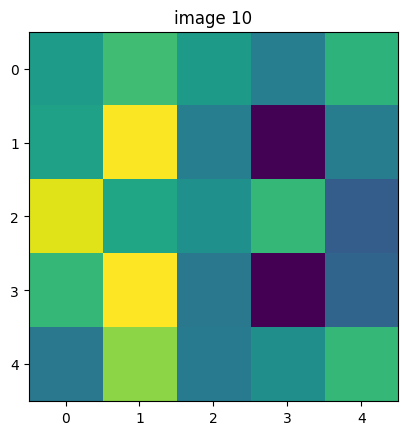

In [4]:
# plot the 10th image

plt.imshow(img_data[10].reshape(dim, dim))
plt.title("image 10")
plt.show();

In [5]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# create torch tensors
y = y.reshape(-1, 1)
y_tensor = torch.tensor(y, dtype = torch.float32).to(device)
img_tensor = torch.tensor(img_data, dtype = torch.float32).to(device)

# set random seed
torch.manual_seed(random_seed)
np.random.seed(random_seed)

# split training and testing set and pass them into torch dataloaders
X_train, X_test, y_train, y_test = train_test_split(img_tensor, y_tensor, test_size = 0.2, random_state = random_seed)

In [34]:
import os
import sys

# Add the project's root directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from GP_comp import GP
import random
import numpy as np
import math
import matplotlib.pyplot as plt
random.seed(42)
np.random.seed(42)

dim = 10 #length of the image
poly_degree=20
a=0.01
b=20

In [35]:
def plot_image(img, label="probabilities", title="probabilities"):
    if len(img.shape) == 1:
        side_length_of_image = int(math.sqrt(img.shape[0]))
        img = img.reshape(side_length_of_image, side_length_of_image)
    plt.figure()
    plt.imshow(img, interpolation='nearest')
    plt.colorbar(label=label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [36]:
v_list = GP.generate_grids(dimensions=2, num_grids=dim, grids_lim=np.array([-1, 1]))
true_beta2 = np.exp(-5 * (v_list2[:, 0] - 1.5 * np.sin(math.pi * np.abs(v_list2[:, 1])) + 1.0) ** 2)

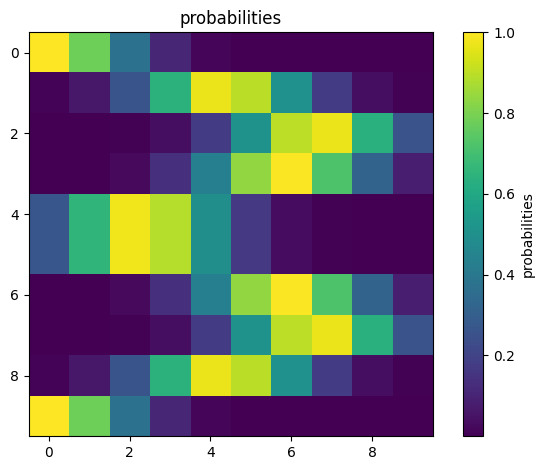

In [37]:
plot_image(true_beta2)

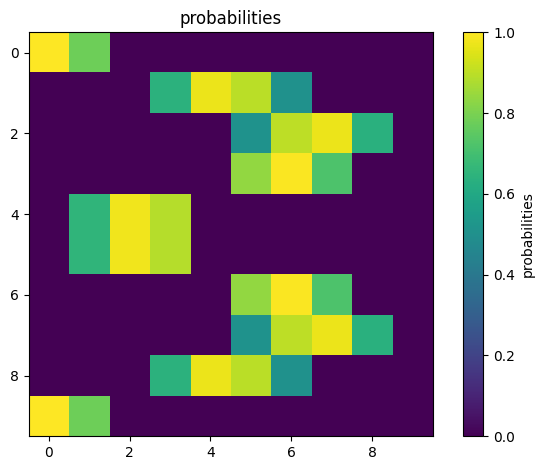

In [38]:
true_beta2[true_beta2 < 0.5] = 0
plot_image(true_beta2)

In [48]:
p2 = v_list.shape[0]
Psi = GP.gp_eigen_funcs_fast(v_list, poly_degree=poly_degree, a=a, b=b, orth=True)
# compute eigen values
lam = GP.gp_eigen_value(poly_degree=poly_degree, a=a, b=b, dimensions=np.array(v_list).shape[1])
# convert to python list
lam = list(lam)
# compute sqrt lambda for each lambda val
sqrt_lambda = list(np.sqrt(lam))
# transpose Psi to shape [num of grid points, poly degree]
Psi = np.transpose(np.array(Psi))
# creates empty matrix of shape [num_grid points, poly degree]
Bases2 = np.zeros((Psi.shape[0], Psi.shape[1]))
# for each basis function i. multiply it's value by sqrt lambda_i.
for i in range(len(sqrt_lambda)):
    Bases2[i, :] = Psi[i, :] * sqrt_lambda[i]

In [50]:
n =49
r2=0.8
theta2 = np.random.normal(size=n * Bases2.shape[0], scale=1 / np.sqrt(p2))
# print(f'theta2={theta2} theta2.shape={theta2.shape}')

# reshapes theta to [polydegree, num samples]
theta2 = theta2.reshape(Bases2.shape[0], n)
# print(f'theta2.shape={theta2.shape}')
# simulate an image
# img1 = np.transpose(np.dot(np.transpose(Bases1), theta1))
# constructs image. img2.shape = [n, poly_degree_for_eigen]. each row is one image, a_for_eigen flattened vector
# transpose flips axis.
img2 = np.transpose(np.dot(np.transpose(Bases2), theta2))
# img2=np.dot(np.transpose(theta2), np.transpose(Bases2))
# print(f'img2.shape={img2.shape}')

# dot: matrix multiplication. dot product. 1D vector dot 1D vector returns scalar
# [m, k] dot [k] returns array shape [m]
# [m, k] dot [ k, n] returns [m,n]
# variance of sigma^2 constant value added to every y
theta0 = 2
# computes true outcome of y without noise. mean_y.shape = [n]
mean_Y = theta0 + np.dot(img2, true_beta2)  # + np.dot(img1, true_beta1)
# mean_Y = theta0 + np.dot(img2,true_beta2)
# computes noise variance for true y. true_sigma2.shape = [n]
true_sigma2 = np.var(mean_Y) * (1 - r2) / r2
# adds gaussian noise to true y.
Y = mean_Y + np.random.normal(size=n, scale=np.sqrt(true_sigma2))

In [56]:
mean_Y

array([2.16842182, 1.74099662, 2.85282506, 1.96051318, 2.93618609,
       1.96975913, 2.05268687, 2.41926537, 2.68370682, 1.45618513,
       1.75914269, 3.12749003, 2.81322034, 2.14689209, 2.5797179 ,
       1.24267072, 1.31228906, 2.32799971, 1.33330847, 3.33160383,
       2.22189048, 2.23837059, 1.40715861, 1.24044914, 2.3589134 ,
       1.83863079, 1.54794551, 1.58482961, 2.57851116, 2.95814524,
       2.38020747, 1.82073609, 1.6261246 , 2.65733362, 2.81737714,
       2.81033167, 2.35984558, 3.08666453, 2.12897849, 1.76668548,
       2.22231272, 2.43148804, 1.44166178, 1.47107691, 1.98667878,
       1.09127468, 1.83683546, 2.23447804, 3.00302689])